<table class="tfo-notebook-buttons" align="left"">
  <td>
          <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/ub_logo-01.png" width="120"/>
    </a>
  </td>
    <td style="width:5%">
        </td>
    <td>
        <h1> 4. Difracció </h1>
    </td>
        <td style="width:5%">
        </td>
    <td>
        <div style="text-align: right"><sub>This notebook is distributed under the <br>
            <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 license</a></sub></div>
    </td>
</table>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from ipywidgets import interactive, interact_manual, interact, FloatSlider

fshift = np.fft.fftshift
ifshift = np.fft.ifftshift
fft = lambda im, pad, pad2: fshift(np.fft.fft2(ifshift(im), (pad, pad2)))
ifft = lambda im, pad, pad2: ifshift(np.fft.ifft2(fshift(im), (pad, pad2)))

https://webb.nasa.gov/content/about/comparisonWebbVsHubble.html

In [4]:
webb = plt.imread("raw_images/22t_3_difraccio_webbMirror.png")[:,:,0]
N = webb.shape

N_webb = 131.4 / 6.5  # focal-length/diameter 

In [5]:
N_hubble = 57.6 / 2.4  # focal-length/diameter 
r_H = 400 * N_webb / N_hubble

x0 = np.linspace(-N[0]//2, N[0]//2, N[0])
y0 = np.linspace(-N[1]//2, N[1]//2, N[1])
x, y = np.meshgrid(x0, y0)

hubble = (x**2 + y**2 < r_H**2) * 1 
hubble -= (x**2 + y**2 < (0.2*r_H)**2) * 1

hubble[N[0]//2-4:N[0]//2+4, :] = 0
hubble[:, N[1]//2-4:N[1]//2+4] = 0


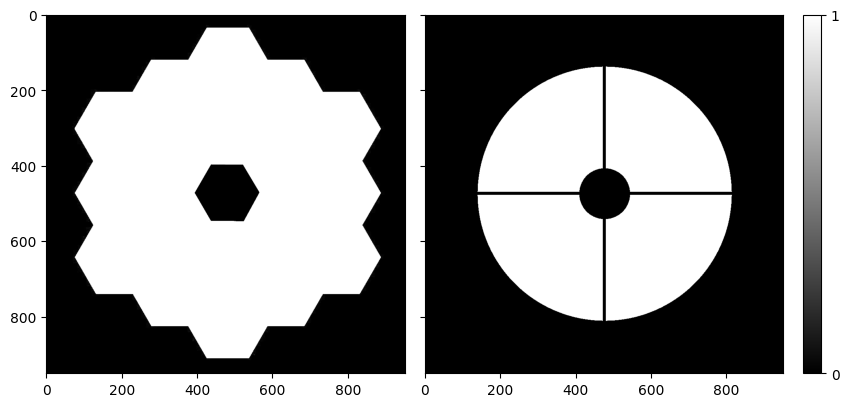

In [6]:
fig = plt.figure(figsize=(10, 20))
axs = ImageGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.2,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.2
                )

im = axs[0].imshow(webb, cmap='gray')
im = axs[1].imshow(hubble, cmap='gray')

cbar = plt.colorbar(im, cax=axs.cbar_axes[0], ticks=[0, 1])

In [7]:
WEBB = np.abs(fft(webb, 2000, 2000))
WEBB /= WEBB.max()
trim = 500
WEBB_subset = WEBB[trim:-trim, trim:-trim]

HUBBLE = np.abs(fft(hubble, 2000, 2000))
HUBBLE /= HUBBLE.max()
HUBBLE_subset = HUBBLE[trim:-trim, trim:-trim]

In [13]:
@interact
def plot(gain=FloatSlider(value=0, min=0., max=2.5, step=0.1, 
                          continuous_update=False)):
    fig = plt.figure(figsize=(10, 5))
    axs = ImageGrid(fig, 111,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="5%",
                    cbar_pad=0.2
                    )
    maximum = 10**(-gain)
    im = axs[0].imshow(WEBB_subset, vmin=0, vmax=maximum)
    im = axs[1].imshow(HUBBLE_subset, vmin=0, vmax=maximum)
    axs[0].set_title('James Web Space Telescope')
    axs[1].set_title('Hubble Space Telescope')
    cbar = plt.colorbar(im, cax=axs.cbar_axes[0], ticks=[0, maximum/2, maximum])
    plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='gain', max=2.5), Output()),…

https://en.wikipedia.org/wiki/Convolution

In [9]:
stars = np.random.rand(*N)  #  plt.imread('background.png')  #  Background of far-far-away primitive universe
stars *= np.double(plt.imread('raw_images/background.png'))

N_stars = stars.shape

# Foreground of stars relatively close
stars[124, 254] = 1
stars[224, 364] = 2
stars[324, 234] = 4
stars[424, 434] = 8
stars[524, 284] = 16
stars[624, 284] = 32
stars[124, 484] = 64
stars[224, 534] = 128
stars[324, 584] = 128
stars[424, 484] = 64
stars[524, 384] = 32
stars[624, 484] = 8

STARS = fft(stars, *N)

stars_webb = np.abs(ifft(STARS*webb, *N_stars))
stars_hubble = np.abs(ifft(STARS*hubble, *N_stars))

stars_webb /= stars_webb.max()
stars_hubble /= stars_hubble.max()

In [10]:
@interact(gain=FloatSlider(min=0., max=2.5, step=0.1, continuous_update=False))
def plot(gain=0):
    fig = plt.figure(figsize=(16, 8))
    axs = ImageGrid(fig, 111,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="5%",
                    cbar_pad=0.2
                    )
    maximum = 10**(-gain)
    im = axs[0].imshow(stars_webb, vmin=0, vmax=maximum)
    im = axs[1].imshow(stars_hubble, vmin=0, vmax=maximum)
    cbar = plt.colorbar(im, cax=axs.cbar_axes[0], ticks=[0, maximum/4, maximum/2, 3*maximum/4, maximum])
    plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='gain', max=2.5), Output()),…

https://www.webbcompare.com/index.html

Background image:

<img src="raw_images/background.png" width=300px>

<hr>

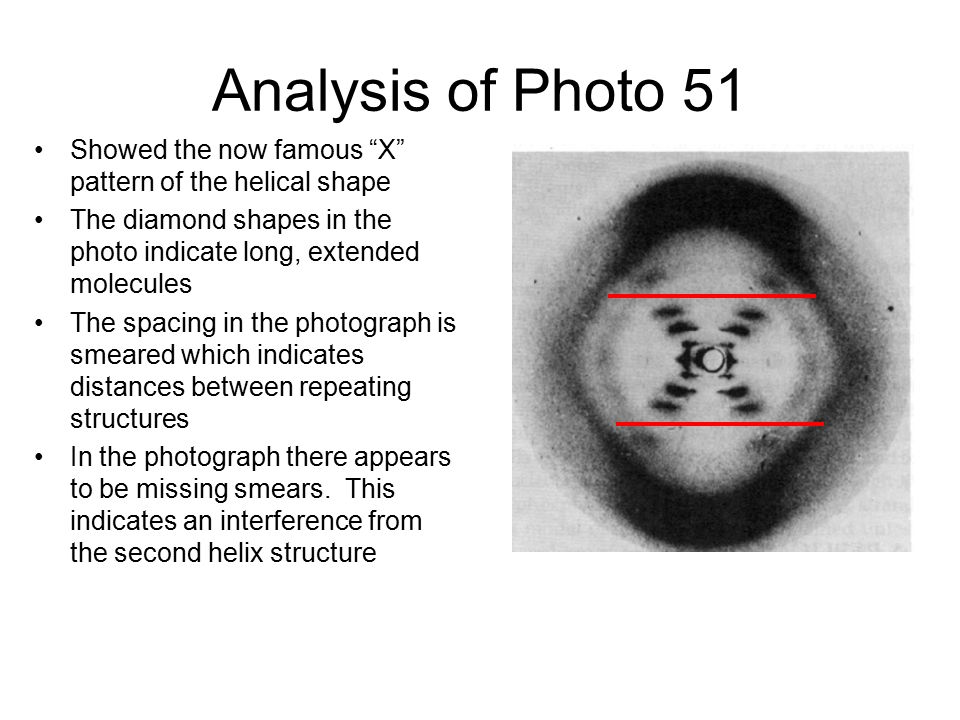

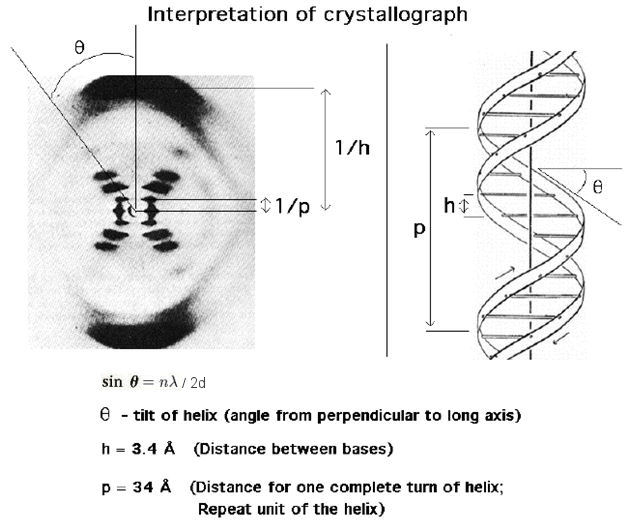

-> 11:39


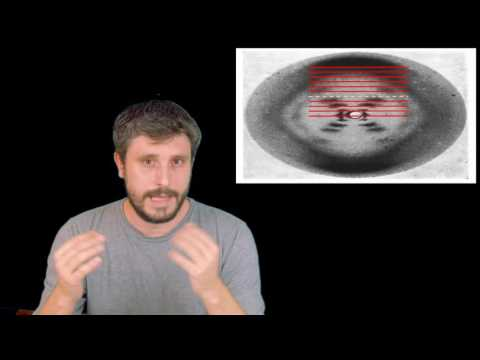

In [11]:
from IPython.display import YouTubeVideo
print("-> 11:39")
YouTubeVideo('0qwihYUSodM', width=1000, height=560)

https://www.youtube.com/watch?v=0qwihYUSodM


<br>

<hr>

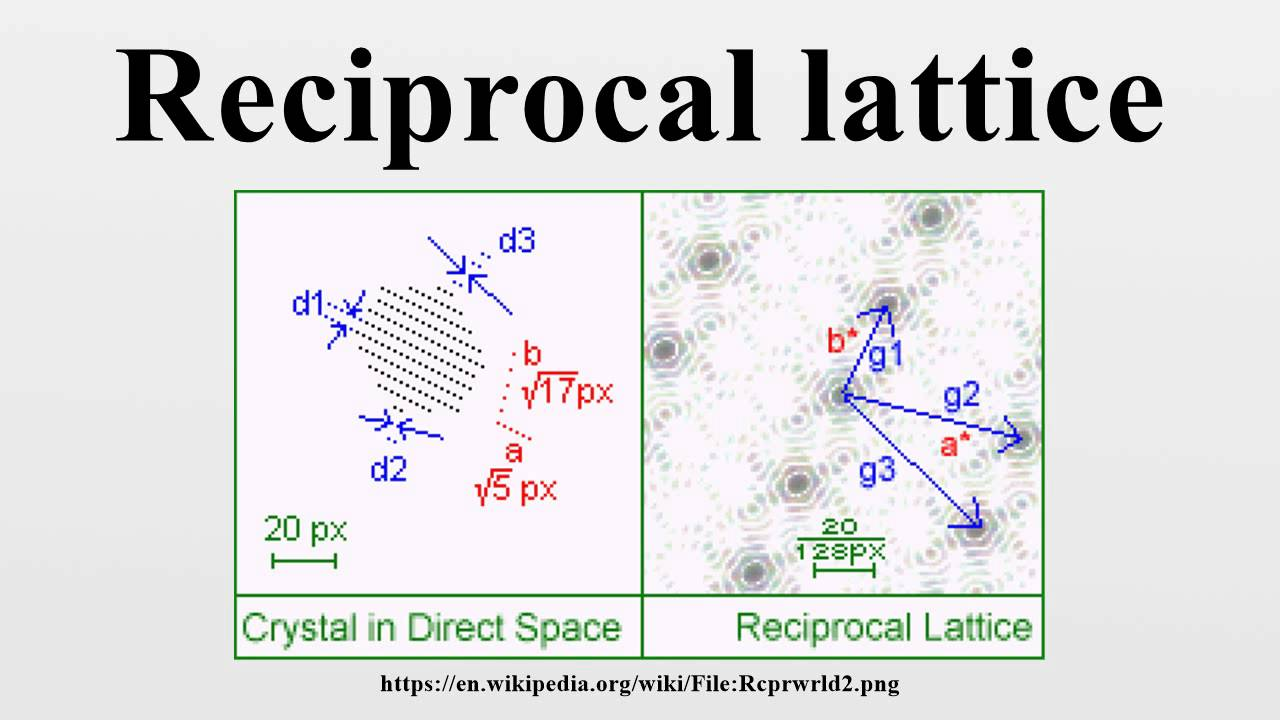